In [7]:
import cv2  # For image processing
import pytesseract  # For OCR
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualization

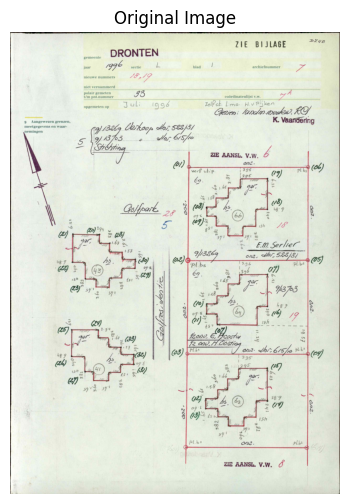

In [6]:
# Load and display the image
image_path = "VW_DTN01_L_00007_101000000000000000002038853600000.front.JPG"

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert from BGR to RGB for proper visualization in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [3]:
# Analyze the image properties
print(f"Image Dimensions: {image.shape}")  # (Height, Width, Channels)
print(f"Image Data Type: {image.dtype}")  # Data type of the pixels


Image Dimensions: (3506, 2504, 3)
Image Data Type: uint8


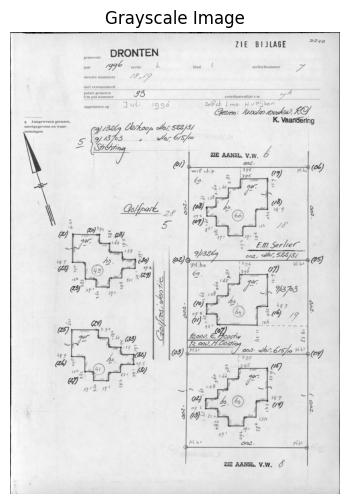

In [10]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,6))
plt.imshow(image_gray, cmap = "gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [11]:
# Update the path to where Tesseract is installed on your system
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [14]:
# Apply OCR to the image
text = pytesseract.image_to_string(image_rgb)

# Print the extracted text
print("Extracted Text:")
print(text)

Extracted Text:
PER

Z1E BIJLAGE
omens DRONTEN

jaar 19ge sectie a blad / archiefnummer 7

nieuwe nummers ib i PAA

niet vernummerd

pope JS coérdinatenlijst v.w. a A
opgemeten op J u Li 10) 3) 6 ZelPsk. l me: .v Py ken

G2: a pear, IY
Aangewezen grenzen, ‘ K. Vaariderir
mectgcgeen a eoaae 9/ A Bo St Lekoop by 524/ LZ / ng
‘o Mar Ste

~ af! ~
~ £m Serlier”
onz, Sarl, $43/3/

Czo4 Ls oe ne,




In [12]:
# Apply OCR to the image
text = pytesseract.image_to_string(image_gray)

# Print the extracted text
print("Extracted Text:")
print(text)

Extracted Text:
ZIE BIJLAGE —

jaar 19ge sectie A. blad / archiefnummer sf.
f ‘>?

iP
nieuwe nummers SO 97 Y

niet vernummerd

ol a te ace = de cae poe ae: Sees dies
vm pnt-nummer zy . FS : codrdinatenlijst v.w. uF a
opgemeten op J uli { o o o ZelPsb. l ma: HP.v Py ken
CPZ: a pee £G/
K. Vaardering

g Aangewezen grenzen,
meetgegevens en waar-
nemingen

| 9) [386 Leikoap yy S28/3/
Wy 43, O35 wa Mayr C/o
KAI |

\y

2

- "5 rn
~ £m Serlier”
onz, Sarl, S43/3/

Cao Lexy een Ke,




## Observations:
- The image has some noise that affects OCR accuracy.
- Numeric data needs to be isolated.

## Pre-Processing Grayscale Image
- blurring
- adaptive threshold
- results

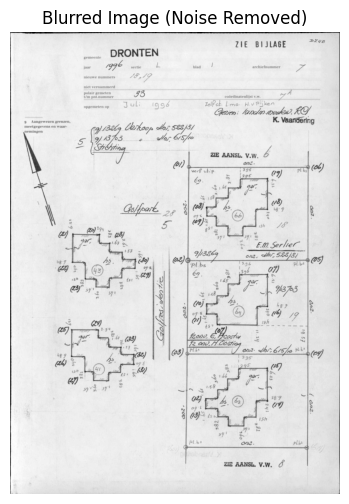

In [15]:
# Apply Gaussian blur to remove noise
blurred_image = cv2.GaussianBlur(image_gray, (5, 5), 0)

# Display the blurred image
plt.figure(figsize=(10, 6))
plt.imshow(blurred_image, cmap="gray")
plt.title("Blurred Image (Noise Removed)")
plt.axis("off")
plt.show()

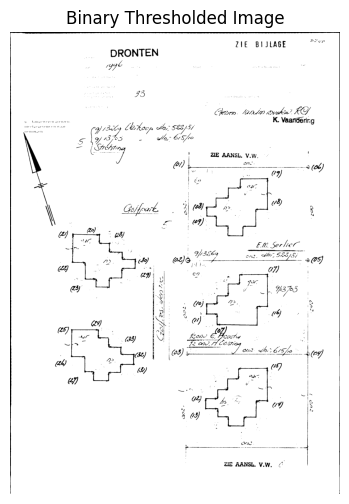

In [16]:
# Apply binary thresholding
_, binary_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)

# Display the binary image
plt.figure(figsize=(10, 6))
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Thresholded Image")
plt.axis("off")
plt.show()

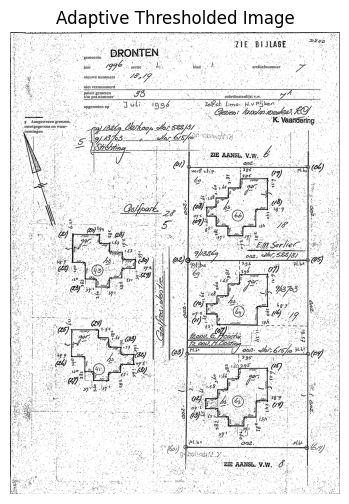

In [17]:
# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Display the adaptive thresholded image
plt.figure(figsize=(10, 6))
plt.imshow(adaptive_thresh, cmap="gray")
plt.title("Adaptive Thresholded Image")
plt.axis("off")
plt.show()


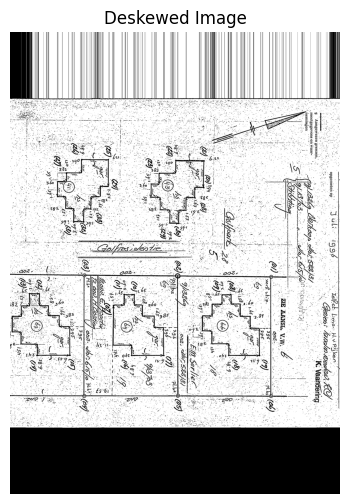

In [19]:
# Function to calculate the skew angle and deskew the image
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    # Rotate the image to deskew
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated

# Deskew the binary image
deskewed_image = deskew(adaptive_thresh)

# Display the deskewed image
plt.figure(figsize=(10, 6))
plt.imshow(deskewed_image, cmap="gray")
plt.title("Deskewed Image")
plt.axis("off")
plt.show()

In [20]:
# Apply OCR on the preprocessed image
preprocessed_text = pytesseract.image_to_string(deskewed_image)

# Print the extracted text
print("Extracted Text After Preprocessing:")
print(preprocessed_text)

Extracted Text After Preprocessing:
. ‘Aangewezen’grenzen,

_meeigegevens eniwaar- "+ 2° ey PBR KY fo.
_Meelgegevens en Waar- "> ; Va rh ao
“nemingen: | Poe a EB OF AAMOO




In [22]:
# Apply OCR on the preprocessed image
preprocessed_text = pytesseract.image_to_string(adaptive_thresh)

# Print the extracted text
print("Extracted Text After Preprocessing:")
print(preprocessed_text)

Extracted Text After Preprocessing:
“"gemeente, DRONTEN .

a

. . bos ett
os o a on t : - eet “s u
nieuwe nummers mn. LO SG wo

CU polait'gemeten "
‘t/m pnt. AuMMEr oe

= EE as aCe
eds Gain! ble ade

9 wangew ezen ‘grenzen, a
: ‘meeigegevens en Waar-




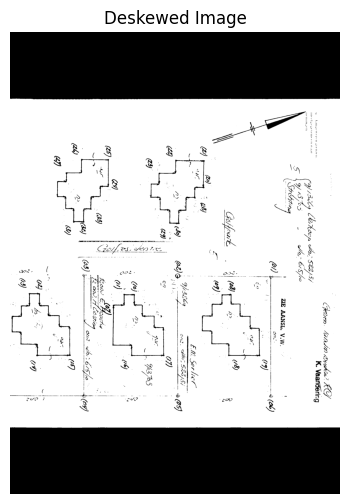

In [23]:
# Function to calculate the skew angle and deskew the image
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    # Rotate the image to deskew
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated

# Deskew the binary image
deskewed_image = deskew(binary_image)

# Display the deskewed image
plt.figure(figsize=(10, 6))
plt.imshow(deskewed_image, cmap="gray")
plt.title("Deskewed Image")
plt.axis("off")
plt.show()

In [24]:
# Apply OCR on the preprocessed image
preprocessed_text = pytesseract.image_to_string(deskewed_image)

# Print the extracted text
print("Extracted Text After Preprocessing:")
print(preprocessed_text)

Extracted Text After Preprocessing:
Reem. Mind peak! KY
K. Vaarideririg

. 7 } ZIE AANSL. V.W.

: = 9 (06
pe ay

8)
Z~ (09) |
, LUE Ser ler”
— WY35Es ang, War, SkE/S;
@2) Oj ha 37
+ /ee 2 | |
: n *) @) ; . S
aN | ; 6 2
NO KS 00e LO,

~~ }

On2 leer 6Sfo ~p (ey)
“9

G
v.

crv? )




# Applying Similar procedure onto the colored images

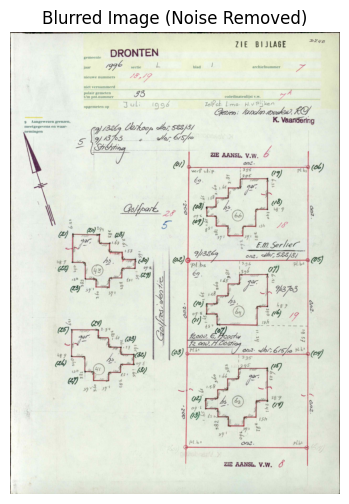

In [32]:
# Apply Gaussian blur to remove noise
blurred_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Display the blurred image
plt.figure(figsize=(10, 6))
plt.imshow(blurred_image)
plt.title("Blurred Image (Noise Removed)")
plt.axis("off")
plt.show()

In [26]:
# Apply OCR on the preprocessed image
preprocessed_text = pytesseract.image_to_string(blurred_image)

# Print the extracted text
print("Extracted Text After Preprocessing:")
print(preprocessed_text)

Extracted Text After Preprocessing:
9 Aangewezen grenzen,

meetgegevens en waar-
nemingen

PZEB

Z1E BIJLAGE

jaar 1996 sectie h blad

7 ‘So , Pk ad

/ archiefnummer m4

nieuwe nummers

niet vernummerd

polair gemeten fe) y A

Um pnt.numme c obdrdinatentlijst v.w.
Jul:

: -ZelPsk. lL ma: H.v Ripken

Gzicn: ince eras KO
K. Vaardering

opgemeten op

Gl LIE Lekoop Api S88 /5/
YS, 03 a Aas 6/ Se
Gs

;
ST yf tates 4

- 5! 2
~ £m Serler
onz, Sol, $43/3/




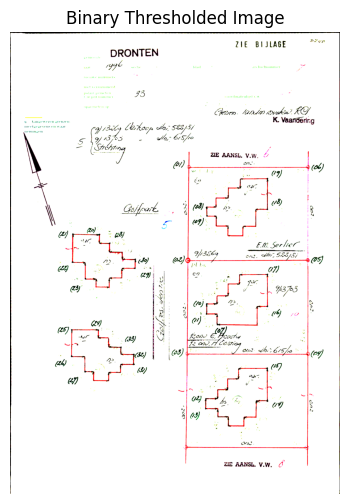

In [34]:
# Apply binary thresholding
_, binary_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)

# Display the binary image
plt.figure(figsize=(10, 6))
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Thresholded Image")
plt.axis("off")
plt.show()

In [35]:
# Apply OCR on the preprocessed image
preprocessed_text = pytesseract.image_to_string(binary_image)

# Print the extracted text
print("Extracted Text After Preprocessing:")
print(preprocessed_text)

Extracted Text After Preprocessing:
PLoep

Z1E BIJLAGE
DRONTEN

gem
aot ‘99D seetie . bhad ‘ are bedmomigier

A
HC UAN OC TUTEG ES.

red Vee UTinette
72

polar gemeten BS

Por pert nusitives COOP TALC TLLESE VAS

K. Vaariderinig

re YY LeXoap wh, S84/3/

Lim Serliel™

Af So We Me. 7

2
ZS

G




## Observations:
- Preprocessing improved OCR results by reducing noise and aligning text.
- Binary thresholding worked better than adaptive thresholding.
- Deskewing helped align slanted text.
- Colored Images are giving better outcomes then a grayscale image

In [36]:
# Example with custom Tesseract configurations
custom_config = r'--psm 6 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

# Apply OCR with the custom configuration
optimized_text = pytesseract.image_to_string(blurred_image, config=custom_config)

# Print the optimized extracted text
print("Optimized Extracted Text:")
print(optimized_text)

Optimized Extracted Text:
ZIEBIJLAGE aie
gemeente DRONTEN
jaar 1996 sectie hi blad archiefnummer
nieuwenummers ti SS vi
A
nietvernummerd P ma a sno celal
iapotapeanaes efe 0rdinatenlijstvw i
opgemetenop a u L 10 5 o ZelPsk l maH v Pijken dela
GaienlondinsreckKOY
9Aangewezengrenzen K Vaariderir
Ps Ti MNaOSf00
e7 A
01 anae a
C verfskip 1395 a pl 06
bo see
3 3 58 7 i a eI
08
Golfear Po g er vA S
G ra g Sy hiad59 ms
te ay ye is LEMSerlier
i386 ORES
v7 yee creLHOS
4 Se Ptbs Me el
1549 puegpealltTbuy v sus i sO ar 2
CFs Brut 4 pP5
x nA 87
u GYxrd Gfie 19 Z
Os ay S a 19h
5 294 NY Lf peal
Cy VA z Nasty be a
ie 034fit f002thir65fyo
aeh 4 if 4 1 ol 3 CY
oe pea
sok sy wwey 158
yo9s 4s 2 z 7y y
be Y y yo x s
3C5PStsvbegeted
eS
39 Ss
4 Plbs OAZ plbs
ZIEAANSLvw



In [39]:
# Example with custom Tesseract configurations
custom_config = r'--psm 4 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

# Apply OCR with the custom configuration
optimized_text = pytesseract.image_to_string(blurred_image, config=custom_config)

# Print the optimized extracted text
print("Optimized Extracted Text:")
print(optimized_text)

Optimized Extracted Text:
Z1EBIJLAGE a

jaar 1996 sectie be blad archiefnummer 7

nieuwenummers ti Pha

nietvernummerd a ee be Pee aoe baa
Uinpokauomnes JS Pra codrdinatenlijstvw ae A sear
opgemetenop i u L ba 1 o qelPst l ma Vv Pj ke n

Gzicn eee IY
9Aangewezengrenzen K Vaaridering

meetgegevensenwaar 9 yok Leikoopob 17 SEEfS

YBps4 ie O1Se

met wb

LM Serhier
onzSlar4383




In [42]:
# Example with custom Tesseract configurations
custom_config = r'--psm 3 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

# Apply OCR with the custom configuration
optimized_text = pytesseract.image_to_string(blurred_image, config=custom_config)

# Print the optimized extracted text
print("Optimized Extracted Text:")
print(optimized_text)

Optimized Extracted Text:
9Aangewezengrenzen

meetgegevensenwaar
nemingen

PZEB

Z1EBIJLAGE

jaar 1996 sectie hi blad

7 So Pha

archiefnummer m4

nieuwenummers

nietvernummerd

polair gemeten Sfe y A

Um pntnumme c obdrdinatentlijst vew
Jul

ZelPsk Lma HvPipken

Gzicn inaeeirare KO
KVaardering

opgemetenop

GLE Lekoop Api S8E5
YS 03 a Aas 67 Se
Gs

Tyftatmeae4

5 2
LmMSerler
onzSolS433




In [45]:
# Example with custom Tesseract configurations
custom_config = r'--psm 6 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

# Apply OCR with the custom configuration
optimized_text = pytesseract.image_to_string(image_rgb, config=custom_config)

# Print the optimized extracted text
print("Optimized Extracted Text:")
print(optimized_text)


Optimized Extracted Text:
Z1EBIJLAGE ise
gemeente DRONTEN
jaar 19ge sectie a blad archiefnummer oe
nieuwenummers 70 AGF
J
nietvernummerd
po airgeme en Teeaietrcn
opgemeteno J u Li 10 9 6 ZelPsk l maHv Pivken
7 GaienloncnweckwIY
Aan wezengrenzen K Vaaridering
9Aange 8 F
eet enwaar G13i86 Lekoop by SLEfS
oly of AMySfe0
ZIEAANSLVW
01t ane 4
C TverP skip 1395 Cy plbs c6
bp oo
365 j pW
3 59 7 q i
fa y d
Gofpak5y 8 ogee eh
ogy re
a G4 s7 59
oo w
ate LipSerlrer
na ae YoI8EG onzWal5883
hg7 r 59 G2 394 ce e5
C O92 Ptbs C7 i
i w74 a mp w
Bsa e Nf ae
WYopsteGf3
N ofes 6y j 3U fs
Se SUPPO7ae wh
af womy47 33 h feoneeastey na
ryt Sa x ae
hgg yy fe 3e e3 oct VE 6150 c ey
G4 sy 2 o9 kee WS
anOACT 1 o ee
2 Pig LHe 124 4 aA i
Af Jou Ser Vi Ne
seh abe Pe see
oe q wIN
Gtg G B9
5 os es ps fIsh
fo pane ba
39 Ss
4 Plbs OnZ pLbs
ZIEAANSLvw



In [46]:
# Example with custom Tesseract configurations
custom_config = r'--psm 3 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

# Apply OCR with the custom configuration
optimized_text = pytesseract.image_to_string(image_rgb, config=custom_config)

# Print the optimized extracted text
print("Optimized Extracted Text:")
print(optimized_text)


Optimized Extracted Text:
PER

Z1EBIJLAGE
cmeeneDRONTEN

jaar 19ge sectie a blad archiefnummer 7

nieuwenummers bi PAA

nietvernummerd

pope JS codrdinatenlijstvw a A
opgemetenop J u Li 10 3 6 ZelPsk l me Vv Py ken

G2D pra IY
Aangewezengrenzen K Vaariderir
mectgcgeen eoaae 9 A Bo St Lekoop by 524f LZ rf ng
o Mar Ste

af
LmMSerlier
onzSarlS433

Czo4 Ls ne




In [47]:
# Configure Tesseract to only recognize digits (digits whitelist)
custom_config_digits = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789'

# Run Tesseract OCR
digits_only_text = pytesseract.image_to_string(image_gray, config=custom_config_digits)

# Print the result
print("Extracted Numbers:")
print(digits_only_text)

Extracted Numbers:
21
199
70 4
996
9
91386 5283
4 5
2
01 4
395 0
5
2
2 9 4 4
7 2
25833
7 750 26 5
44 7 5 7
74 4
2 9
3 57 168 4 73703
139
2
47
19 4086 3 17
3
7 0958
1 2
3
59
4 589
8 3 5 7
2
59
4
2



In [49]:
# Configure Tesseract to only recognize digits (digits whitelist)
custom_config_digits = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789'

# Run Tesseract OCR
digits_only_text = pytesseract.image_to_string(binary_image, config=custom_config_digits)

# Print the result
print("Extracted Numbers:")
print(digits_only_text)

Extracted Numbers:
21
1
5251
5
2
8
2 8
09
4
3 2 2 28
28
2



In [50]:
# Configure Tesseract to only recognize digits (digits whitelist)
custom_config_digits = r'--oem 3 --psm 3 -c tessedit_char_whitelist=0123456789'

# Run Tesseract OCR
digits_only_text = pytesseract.image_to_string(image_gray, config=custom_config_digits)

# Print the result
print("Extracted Numbers:")
print(digits_only_text)

Extracted Numbers:
21816

199

797

1
5
0 3 0
2

9

9386 5283
43 3 5

2

5
433

4




In [53]:
# Configure Tesseract to only recognize digits (digits whitelist)
custom_config_digits = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789'

# Run Tesseract OCR
digits_only_text = pytesseract.image_to_string(blurred_image, config=custom_config_digits)

# Print the result
print("Extracted Numbers:")
print(digits_only_text)

Extracted Numbers:
216
1996
4
7
0
0 10 5
9
500
7
01
1395 06
5
3 3 58 7
08
8 4
59
2
386
7
4 7
1549 53 5 2
9 4 5
87
19
19
5 294 1
034 00265
4 4 1 3
59 5 4 158
9 4 2 7
352
8
39
4
2



In [55]:
# Configure Tesseract to only recognize digits (digits whitelist)
custom_config_digits = r'--oem 3 --psm 11 -c tessedit_char_whitelist=0123456789'

# Run Tesseract OCR
digits_only_text = pytesseract.image_to_string(blurred_image, config=custom_config_digits)

# Print the result
print("Extracted Numbers:")
print(digits_only_text)

Extracted Numbers:
27

76

1996

4

5

8

994

9

3

4

5

2

1395

2

98

7

168

58

8

03

9

1

9

65

57

597

1

4383

7

2

9

1296

07

5

145

59

7

148

8

6

19

1

2

294

00

18

2

7

53

25

4

3

395

137

144

158

5

587

09

7

83

254

1

39

2



In [2]:
pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/29/d4/1244ab8edf173a10fd601f7e13b9566c1b525c4f365d6bee918e68381889/pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/11/c3/005fcca25ce078d2cc29fd559379817424e94885510568bc1bc53d7d5846/pytz-2024.2-py2.py3-none-any.whl.metadata
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/0f/dd/84f10e23edd882c6f968c21c2434fe67bd4a528967067515feca9e611e5e/tzdata-2025.1-py2.py3-none-any.whl.metadata
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
   ---------------------------------------- 0.0/346.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/346.8 


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


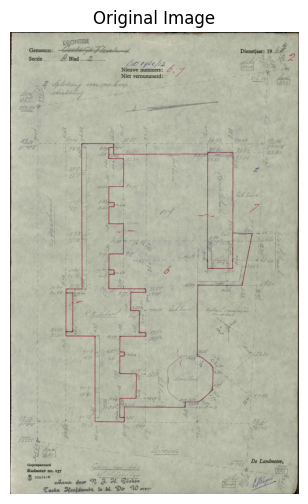

In [10]:
# Load and display the image
image_path = "VW_DTN01_A_00002_101000000000000000002051033000000.front.JPG"

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert from BGR to RGB for proper visualization in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

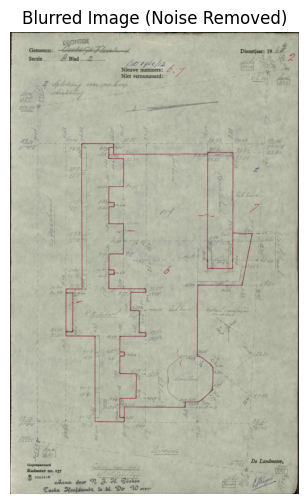

In [11]:
# Apply Gaussian blur to remove noise
blurred_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Display the blurred image
plt.figure(figsize=(10, 6))
plt.imshow(blurred_image)
plt.title("Blurred Image (Noise Removed)")
plt.axis("off")
plt.show()